In [1]:
import pandas as pd
import numpy as np
import gc

# Validation Sets

## Gaia 

In [75]:
# Get gaia pkl 
vagngaia = pd.read_pickle("Pickles/vcleaned3/agn_gaia.pkl")
vbingaia = pd.read_pickle("Pickles/vcleaned3/bin_gaia.pkl")
vstargaia = pd.read_pickle("Pickles/vcleaned3/star_gaia.pkl")
vgalgaia = pd.read_pickle("Pickles/vcleaned3/gal_gaia.pkl")

# Get obsid of bad lamost spectra and make it all int 64
bad_lamost = pd.read_pickle("Pickles/drops/all_lamost.pkl")
bad_lamost = list(map(int, bad_lamost))

# remove bad lamost spectra from gaia dataframes whose obsid is in bad_lamost
print("len(binary) before removing bad lamost spectra:", len(vbingaia))
vbingaia = vbingaia[~vbingaia["obsid"].isin(bad_lamost)]
print("len(binary) after removing bad lamost spectra:", len(vbingaia))

print("len(star) before removing bad lamost spectra:", len(vstargaia))
vstargaia = vstargaia[~vstargaia["obsid"].isin(bad_lamost)]
print("len(star) after removing bad lamost spectra:", len(vstargaia))

print("len(gal) before removing bad lamost spectra:", len(vgalgaia))
vgalgaia = vgalgaia[~vgalgaia["obsid"].isin(bad_lamost)]
print("len(gal) after removing bad lamost spectra:", len(vgalgaia))

print("len(agn) before removing bad lamost spectra:", len(vagngaia))
vagngaia = vagngaia[~vagngaia["obsid"].isin(bad_lamost)]
print("len(agn) after removing bad lamost spectra:", len(vagngaia))

# Make the folder for the cleaned dataframes
!mkdir Pickles/vcleaned4

# Save the cleaned dataframes
vbingaia.to_pickle("Pickles/vcleaned4/bin_gaia.pkl")
vstargaia.to_pickle("Pickles/vcleaned4/star_gaia.pkl")
vgalgaia.to_pickle("Pickles/vcleaned4/gal_gaia.pkl")
vagngaia.to_pickle("Pickles/vcleaned4/agn_gaia.pkl")




len(binary) before removing bad lamost spectra: 399
len(binary) after removing bad lamost spectra: 381
len(star) before removing bad lamost spectra: 400
len(star) after removing bad lamost spectra: 386
len(gal) before removing bad lamost spectra: 399
len(gal) after removing bad lamost spectra: 382
len(agn) before removing bad lamost spectra: 400
len(agn) after removing bad lamost spectra: 391
mkdir: cannot create directory ‘Pickles/vcleaned4’: File exists


## Lamost

In [34]:
# open the pkl file with the list of files to drop
nan_gaia = pd.read_pickle("Pickles/drops/gaiaall.pkl")
num_to_remove = len(nan_gaia)
num_removed = 0


# Training dataset
# GALAXIES
df = pd.read_pickle('Pickles/lmst/interpolated_data/val_gal.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]    
print(f"GALAXIES: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/val_gal2.pkl')

# BINARY STARS
df = pd.read_pickle('Pickles/lmst/interpolated_data/val_bin.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"BINARY STARS: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/val_bin2.pkl')

# AGNs
df = pd.read_pickle('Pickles/lmst/interpolated_data/val_agn.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"AGNs: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/val_agn2.pkl')

# STARS
df = pd.read_pickle('Pickles/lmst/interpolated_data/val_star.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"STARS: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
print(f"Total number of rows removed: {num_removed} out of {num_to_remove}")
df.to_pickle('Pickles/lmst/interpolated_data/val_star2.pkl')

GALAXIES: Number of rows before dropping: 383 and after dropping: 383
BINARY STARS: Number of rows before dropping: 381 and after dropping: 381
AGNs: Number of rows before dropping: 391 and after dropping: 391
STARS: Number of rows before dropping: 386 and after dropping: 386
Total number of rows removed: 0 out of 236


### Final: Remove obsids that do not match

In [21]:
# load the gaia dataframes to match
vbingaia = pd.read_pickle("Pickles/vcleaned4/bin_gaia.pkl")
vstargaia = pd.read_pickle("Pickles/vcleaned4/star_gaia.pkl")
vgalgaia = pd.read_pickle("Pickles/vcleaned4/gal_gaia.pkl")
vagngaia = pd.read_pickle("Pickles/vcleaned4/agn_gaia.pkl")

# load the lamost dataframes to match
vbinlamost = pd.read_pickle("Pickles/lmst/interpolated_data/val_bin2.pkl")
vstarlamost = pd.read_pickle("Pickles/lmst/interpolated_data/val_star2.pkl")
vgallamost = pd.read_pickle("Pickles/lmst/interpolated_data/val_gal2.pkl")
vagnlamost = pd.read_pickle("Pickles/lmst/interpolated_data/val_agn2.pkl")

# rename the file_name column to obsid to match the column name in the gaia dataframe
vbinlamost.rename(columns={"file_name": "obsid"}, inplace=True)
vstarlamost.rename(columns={"file_name": "obsid"}, inplace=True)
vgallamost.rename(columns={"file_name": "obsid"}, inplace=True)
vagnlamost.rename(columns={"file_name": "obsid"}, inplace=True)

# convert the obsid column to int64 to match the column in the gaia dataframe
vbinlamost["obsid"] = vbinlamost["obsid"].astype(np.int64)
vstarlamost["obsid"] = vstarlamost["obsid"].astype(np.int64)
vgallamost["obsid"] = vgallamost["obsid"].astype(np.int64)
vagnlamost["obsid"] = vagnlamost["obsid"].astype(np.int64)


# match the dataframes and count the number of matches and non-matches
matchedbin = pd.merge(vbingaia, vbinlamost, on="obsid", how="inner")
print("Number of matches in binary:", len(matchedbin))
print("Number of non-matches in binary:", len(vbingaia) - len(matchedbin))

matchedstar = pd.merge(vstargaia, vstarlamost, on="obsid", how="inner")
print("Number of matches in star:", len(matchedstar))
print("Number of non-matches in star:", len(vstargaia) - len(matchedstar))

matchedgal = pd.merge(vgalgaia, vgallamost, on="obsid", how="inner")
print("Number of matches in gal:", len(matchedgal))
print("Number of non-matches in gal:", len(vgalgaia) - len(matchedgal))

matchedagn = pd.merge(vagngaia, vagnlamost, on="obsid", how="inner")
print("Number of matches in agn:", len(matchedagn))
print("Number of non-matches in agn:", len(vagngaia) - len(matchedagn))



Number of matches in binary: 381
Number of non-matches in binary: 0
Number of matches in star: 386
Number of non-matches in star: 0
Number of matches in gal: 382
Number of non-matches in gal: 0
Number of matches in agn: 391
Number of non-matches in agn: 0


In [45]:
# Make the folder for the cleaned dataframes
!mkdir Pickles/combinedgl

In [22]:
# save the combined dataframes
matchedbin.to_pickle("Pickles/fusionv0/vbin.pkl")
matchedstar.to_pickle("Pickles/fusionv0/vstar.pkl")
matchedgal.to_pickle("Pickles/fusionv0/vgal.pkl")
matchedagn.to_pickle("Pickles/fusionv0/vagn.pkl")

# Training sets

In [78]:
# Doing the same for the training data
# Get gaia pkl
tagngaia = pd.read_pickle("Pickles/tcleaned3/agn_gaia.pkl")
tbingaia = pd.read_pickle("Pickles/tcleaned3/bin_gaia.pkl")
tstargaia = pd.read_pickle("Pickles/tcleaned3/star_gaia.pkl")
tgalgaia = pd.read_pickle("Pickles/tcleaned3/gal_gaia.pkl")

# Get obsid of bad lamost spectra and make it all int 64
bad_lamost = pd.read_pickle("Pickles/drops/all_lamost.pkl")
bad_lamost = list(map(int, bad_lamost))

# remove bad lamost spectra from gaia dataframes whose obsid is in bad_lamost
print("len(binary) before removing bad lamost spectra:", len(tbingaia))
tbingaia = tbingaia[~tbingaia["obsid"].isin(bad_lamost)]
print("len(binary) after removing bad lamost spectra:", len(tbingaia))

print("len(star) before removing bad lamost spectra:", len(tstargaia))
tstargaia = tstargaia[~tstargaia["obsid"].isin(bad_lamost)]
print("len(star) after removing bad lamost spectra:", len(tstargaia))

print("len(gal) before removing bad lamost spectra:", len(tgalgaia))
tgalgaia = tgalgaia[~tgalgaia["obsid"].isin(bad_lamost)]
print("len(gal) after removing bad lamost spectra:", len(tgalgaia))

print("len(agn) before removing bad lamost spectra:", len(tagngaia))
tagngaia = tagngaia[~tagngaia["obsid"].isin(bad_lamost)]
print("len(agn) after removing bad lamost spectra:", len(tagngaia))

# Make the folder for the cleaned dataframes
!mkdir Pickles/tcleaned4

# Save the cleaned dataframes
tbingaia.to_pickle("Pickles/tcleaned4/bin_gaia.pkl")
tstargaia.to_pickle("Pickles/tcleaned4/star_gaia.pkl")
tgalgaia.to_pickle("Pickles/tcleaned4/gal_gaia.pkl")
tagngaia.to_pickle("Pickles/tcleaned4/agn_gaia.pkl")

len(binary) before removing bad lamost spectra: 40486
len(binary) after removing bad lamost spectra: 40486
len(star) before removing bad lamost spectra: 83055
len(star) after removing bad lamost spectra: 83055
len(gal) before removing bad lamost spectra: 1620
len(gal) after removing bad lamost spectra: 1620
len(agn) before removing bad lamost spectra: 35806
len(agn) after removing bad lamost spectra: 35806


## Lamost

In [80]:
# open the pkl file with the list of files to drop
nan_gaia = pd.read_pickle("Pickles/drops/gaiaall.pkl")
num_to_remove = len(nan_gaia)
num_removed = 0

# Training dataset
# GALAXIES
df = pd.read_pickle('Pickles/lmst/interpolated_data/train_gal.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"GALAXIES: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/train_gal2.pkl')

# BINARY STARS
df = pd.read_pickle('Pickles/lmst/interpolated_data/train_bin.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"BINARY STARS: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/train_bin2.pkl')

# AGNs
df = pd.read_pickle('Pickles/lmst/interpolated_data/train_agn.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"AGNs: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
df.to_pickle('Pickles/lmst/interpolated_data/train_agn2.pkl')

# STARS
df = pd.read_pickle('Pickles/lmst/interpolated_data/train_star.pkl')
lenghtpre = len(df)
df = df[~df['file_name'].isin(nan_gaia)]
print(f"STARS: Number of rows before dropping: {lenghtpre} and after dropping: {len(df)}")
num_removed += lenghtpre - len(df)
print(f"Total number of rows removed: {num_removed} out of {num_to_remove}")
df.to_pickle('Pickles/lmst/interpolated_data/train_star2.pkl')

GALAXIES: Number of rows before dropping: 1621 and after dropping: 1620
BINARY STARS: Number of rows before dropping: 40554 and after dropping: 40483
AGNs: Number of rows before dropping: 35811 and after dropping: 35806
STARS: Number of rows before dropping: 83162 and after dropping: 83008
Total number of rows removed: 231 out of 236


### Final: Remove OBSID that do not match

### One at a time as df are big

In [16]:
tbingaia = pd.read_pickle("Pickles/tcleaned4/bin_gaia.pkl")
tbinlamost = pd.read_pickle("Pickles/lmst/interpolated_data/train_bin2.pkl")
tbinlamost.rename(columns={"file_name": "obsid"}, inplace=True)
tbinlamost["obsid"] = tbinlamost["obsid"].astype(np.int64)
matchedbin = pd.merge(tbingaia, tbinlamost, on="obsid", how="inner")
print("Number of matches in binary:", len(matchedbin))
print("Number of non-matches in binary:", len(tbingaia) - len(matchedbin))
del tbingaia, tbinlamost
gc.collect()
# remove rows with repeated obsid and print them
matchedbin.drop_duplicates(subset="obsid",inplace=True)
print("Number of matches in binary after removing repeated rows:", len(matchedbin))
# save the matched dataframes
matchedbin.to_pickle("Pickles/fusionv0/tbin.pkl")
del matchedbin
gc.collect()


Number of matches in binary: 40485
Number of non-matches in binary: 1
Number of matches in binary after removing repeated rows: 40483


0

In [17]:
tstargaia = pd.read_pickle("Pickles/tcleaned4/star_gaia.pkl")
tstarlamost = pd.read_pickle("Pickles/lmst/interpolated_data/train_star2.pkl")
tstarlamost.rename(columns={"file_name": "obsid"}, inplace=True)
tstarlamost["obsid"] = tstarlamost["obsid"].astype(np.int64)
matchedstar = pd.merge(tstargaia, tstarlamost, on="obsid", how="inner")
print("Number of matches in star:", len(matchedstar))
print("Number of non-matches in star:", len(tstargaia) - len(matchedstar))
del tstargaia, tstarlamost
gc.collect()
# remove rows with repeated obsid and print them
matchedstar.drop_duplicates(subset="obsid",inplace=True)
print("Number of matches in star after removing repeated rows:", len(matchedstar))
# save the matched dataframes
matchedstar.to_pickle("Pickles/fusionv0/tstar.pkl")
del matchedstar
gc.collect()

Number of matches in star: 83021
Number of non-matches in star: 34
Number of matches in star after removing repeated rows: 83008


0

In [19]:
tgalgaia = pd.read_pickle("Pickles/tcleaned4/gal_gaia.pkl")
tgalloamost = pd.read_pickle("Pickles/lmst/interpolated_data/train_gal2.pkl")
tgalloamost.rename(columns={"file_name": "obsid"}, inplace=True)
tgalloamost["obsid"] = tgalloamost["obsid"].astype(np.int64)
matchedgal = pd.merge(tgalgaia, tgalloamost, on="obsid", how="inner")
print("Number of matches in gal:", len(matchedgal))
print("Number of non-matches in gal:", len(tgalgaia) - len(matchedgal))
del tgalgaia, tgalloamost
gc.collect()
# remove rows with repeated obsid and print them
matchedgal.drop_duplicates(subset="obsid",inplace=True)
print("Number of matches in gal after removing repeated rows:", len(matchedgal))
# save the matched dataframes
matchedgal.to_pickle("Pickles/fusionv0/tgal.pkl")


Number of matches in gal: 1620
Number of non-matches in gal: 0
Number of matches in gal after removing repeated rows: 1620


In [20]:
tagngaia = pd.read_pickle("Pickles/tcleaned4/agn_gaia.pkl")
tagnlamost = pd.read_pickle("Pickles/lmst/interpolated_data/train_agn2.pkl")
tagnlamost.rename(columns={"file_name": "obsid"}, inplace=True)
tagnlamost["obsid"] = tagnlamost["obsid"].astype(np.int64)
matchedagn = pd.merge(tagngaia, tagnlamost, on="obsid", how="inner")
print("Number of matches in agn:", len(matchedagn))
print("Number of non-matches in agn:", len(tagngaia) - len(matchedagn))
del tagngaia, tagnlamost
gc.collect()
# remove rows with repeated obsid and print them
matchedagn.drop_duplicates(subset="obsid",inplace=True)
print("Number of matches in agn after removing repeated rows:", len(matchedagn))
# save the matched dataframes
matchedagn.to_pickle("Pickles/fusionv0/tagn.pkl")
del matchedagn
gc.collect()

Number of matches in agn: 35806
Number of non-matches in agn: 0
Number of matches in agn after removing repeated rows: 35806


0

In [24]:
# Combine all the dataframes
tbin = pd.read_pickle("Pickles/fusionv0/tbin.pkl")
tstar = pd.read_pickle("Pickles/fusionv0/tstar.pkl")
tgal = pd.read_pickle("Pickles/fusionv0/tgal.pkl")
tagn = pd.read_pickle("Pickles/fusionv0/tagn.pkl")
vbin = pd.read_pickle("Pickles/fusionv0/vbin.pkl")
vstar = pd.read_pickle("Pickles/fusionv0/vstar.pkl")
vgal = pd.read_pickle("Pickles/fusionv0/vgal.pkl")
vagn = pd.read_pickle("Pickles/fusionv0/vagn.pkl")

# Combine the dataframes
all = pd.concat([tbin, tstar, tgal, tagn, vbin, vstar, vgal, vagn], ignore_index=True)

In [25]:
# save the combined dataframe
all.to_pickle("Pickles/fusionv0/all.pkl")

# Normalize stuff

In [2]:
# load the combined dataframe
all = pd.read_pickle("Pickles/fusionv0/all.pkl")

### RA

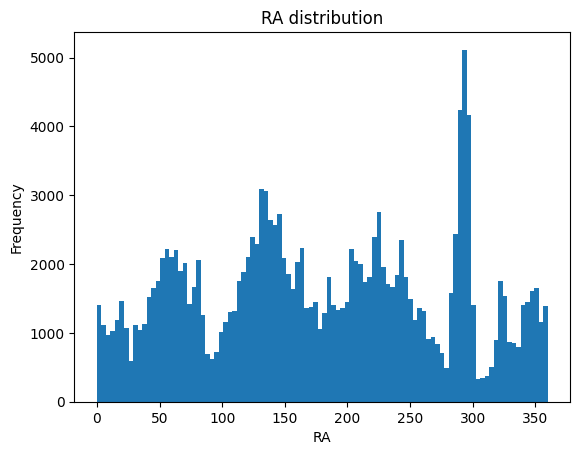

In [8]:
ra = all["ra"]

# plot the ra distribution
import matplotlib.pyplot as plt
plt.hist(ra, bins=100)
plt.xlabel("RA")
plt.ylabel("Frequency")
plt.title("RA distribution")
plt.show()

In [3]:
all.head()

,obsid,ra,dec,ra_error,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,flux_3739,flux_3740,flux_3741,flux_3742,flux_3743,flux_3744,flux_3745,flux_3746,flux_3747,label
0,468609063,324.570577,-2.378171,0.016225,0.016745,1.954333,0.018079,9.053763,0.021535,0.701843,...,7167.345875,7263.572426,7303.474595,7357.885240,7404.294078,7441.365615,7420.467427,7405.088827,7396.33740,binary_star
1,372204081,331.262805,-2.530651,0.070703,0.067052,6.959870,0.079696,37.747680,0.094460,-48.060286,...,79.866584,81.941077,81.858856,68.845152,63.948362,68.458177,83.088772,78.631683,54.30389,binary_star
2,582101233,290.907631,-4.494397,0.017118,0.019111,2.379435,0.024489,4.773883,0.020376,0.057278,...,2216.259456,2280.466721,2329.671777,2347.762757,2372.218792,2404.814844,2425.271277,2447.013868,2470.27880,binary_star
3,552506177,245.009732,-2.237863,0.033039,0.024361,0.287166,0.039560,-6.132932,0.049155,-3.513904,...,88.791816,90.494684,91.909245,91.703833,91.719632,92.037940,93.592554,95.360013,97.32745,binary_star
4,133703002,236.492933,-1.664778,0.028122,0.020411,0.391576,0.034200,-5.637486,0.032797,-2.686811,...,217.617691,220.196599,223.598581,229.456033,227.499663,216.851775,225.748373,230.363614,230.24533,binary_star


In [6]:
# Find the variance of each column individually
vardec = all["dec"].var()
varra = all["ra"].var()
varparallax = all["parallax"].var()
varpmra = all["pmra"].var()
varpmdec = all["pmdec"].var()
varra_error = all["ra_error"].var()
vardec_error = all["dec_error"].var()
varparallax_error = all["parallax_error"].var()
varpmra_error = all["pmra_error"].var()
varpmdec_error = all["pmdec_error"].var()

